# Cognifyz Technologies Internship - Task 1
## Project: Predicting Restaurant Ratings with Machine Learning

This project aims to build a machine learning model to predict the aggregate rating of a restaurant based on its features.

### Steps:
1. Data Preprocessing
2. Model Selection and Training
3. Model Evaluation
4. Feature Importance Analysis


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 1: Importing Libraries and Loading the Dataset

In this section, we begin by importing the essential libraries needed for data manipulation, visualization, and analysis:

- **NumPy**: A powerful library for numerical computations.
- **Pandas**: Useful for data manipulation and analysis, especially for handling tabular data (DataFrames).
- **Matplotlib** and **Seaborn**: Libraries used for data visualization, helping to create informative plots and charts.

Next, we load the dataset from the specified file path using the `pandas.read_csv()` function to prepare it for analysis.

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Dataset.csv")

# Display the first few rows of the dataset to get an overview
df.head()


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Internship/Task_1/Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
# Print the columns of the DataFrame
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [7]:
df.dtypes

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


## Step 2: Data Cleaning - Handling Missing Values

In this step, we focus on cleaning the dataset by handling missing values, which is a crucial part of data preprocessing.

- **Checking for null values**: We first check for any missing (null) values in each column using `isnull().sum()`. This will give us a quick overview of the extent of missing data in the dataset.
  
- **Dropping columns with null values**: If any columns have missing values, we choose to drop them using the `dropna()` function. This ensures that the data we work with is clean and free from incomplete information.

Finally, we display the remaining columns to verify that the dataset is ready for further analysis.


In [8]:
# Check for total null values in each column
null_values = df.isnull().sum()

# Display the total null values for each column
print(null_values)


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [9]:
# Drop columns with null values
df = df.dropna(axis=0, how='any')

# Display the remaining columns
print(df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [10]:
# Check for total null values in each column
null_values = df.isnull().sum()

# Display the total null values for each column
print(null_values)


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


## Step 3: Identifying and Removing Outliers

Outliers can significantly impact the performance of machine learning models, so it's important to identify and handle them appropriately.

- **Box Plotting**: We use box plots to visually inspect the distribution of numerical features and detect outliers. In a box plot, outliers are typically shown as points outside the whiskers of the box.

- **Removing Outliers**: After identifying the outliers, we can remove them based on a chosen threshold, such as the interquartile range (IQR) method. The IQR is the range between the 25th and 75th percentiles, and we consider data points beyond 1.5 times the IQR from the quartiles as outliers.


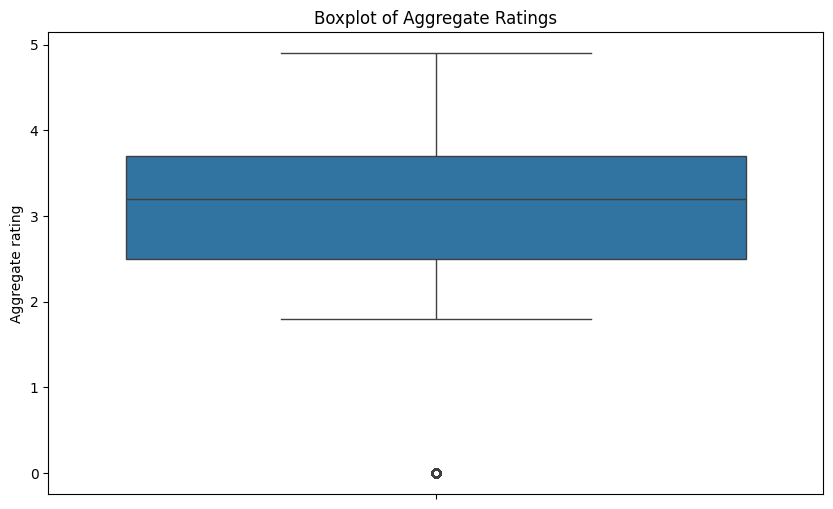

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for outliers in the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Aggregate rating'])
plt.title('Boxplot of Aggregate Ratings')
plt.show()




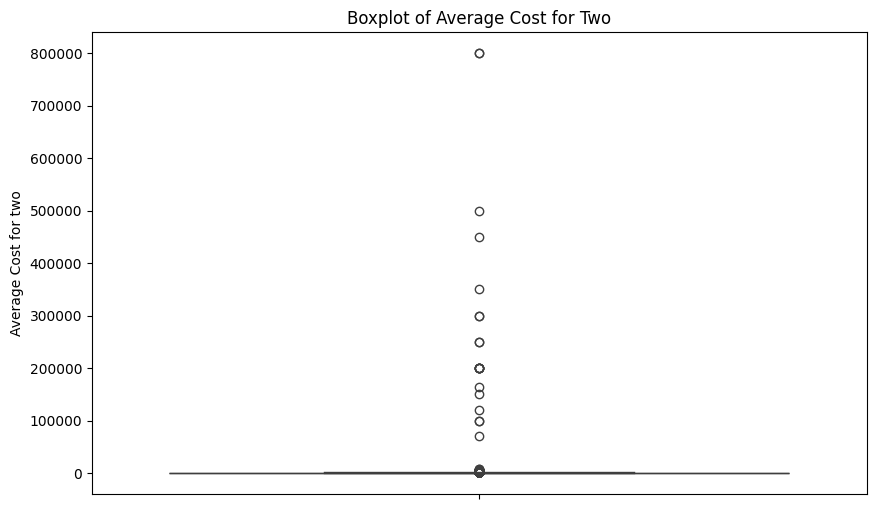

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Average Cost for two'])
# plt.ylim(0, 3000)  # Set y-axis range
plt.title('Boxplot of Average Cost for Two')
plt.show()

In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Average Cost for two'].quantile(0.25)
Q3 = df['Average Cost for two'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the quartiles, IQR, and bounds
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Filter out outliers based on these bounds
outliers = df[(df['Average Cost for two'] < lower_bound) | (df['Average Cost for two'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

# Display the outliers
outliers

Q1 (25th percentile): 250.0
Q3 (75th percentile): 700.0
IQR: 450.0
Lower bound: -425.0
Upper bound: 1375.0
Number of outliers: 853


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,5800316,Cricket Club Cafe,191,Colombo,"12 Flower Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",0.000000,0.000000,"Continental, American, Seafood",...,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,171
9512,5800710,The Manhattan Fish Market,191,Colombo,"31, Deal Place, Off R.A. De Mel Mawatha, Kollu...","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.853364,6.906814,"Seafood, Italian",...,Sri Lankan Rupee(LKR),No,No,No,No,4,4.0,Green,Very Good,196
9513,5800433,The Sizzle,191,Colombo,"32, Walukarama Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.852928,6.904581,"American, Fast Food, Steak, Beverages",...,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,286
9514,5800176,Ministry of Crab,191,Colombo,"Old Colombo Dutch Hospital, Fort, Colombo 01","Old Dutch Hospital, Fort","Old Dutch Hospital, Fort, Colombo",79.844239,6.932814,Seafood,...,Sri Lankan Rupee(LKR),No,No,No,No,4,4.9,Dark Green,Excellent,203


In [14]:
# Filter the dataset to remove outliers
df_new = df[(df['Average Cost for two'] >= lower_bound) & (df['Average Cost for two'] <= upper_bound)]

# Print the shape of the new DataFrame to verify outliers are removed
print(f"Original dataset size: {df.shape}")
print(f"Dataset size after removing outliers: {df_new.shape}")

Original dataset size: (9542, 21)
Dataset size after removing outliers: (8689, 21)


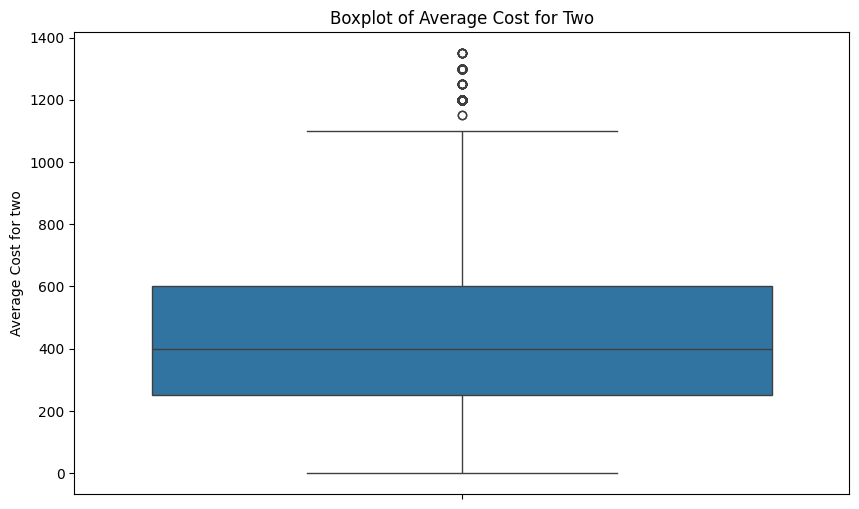

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_new['Average Cost for two'])
# plt.ylim(0, 3000)  # Set y-axis range
plt.title('Boxplot of Average Cost for Two')
plt.show()

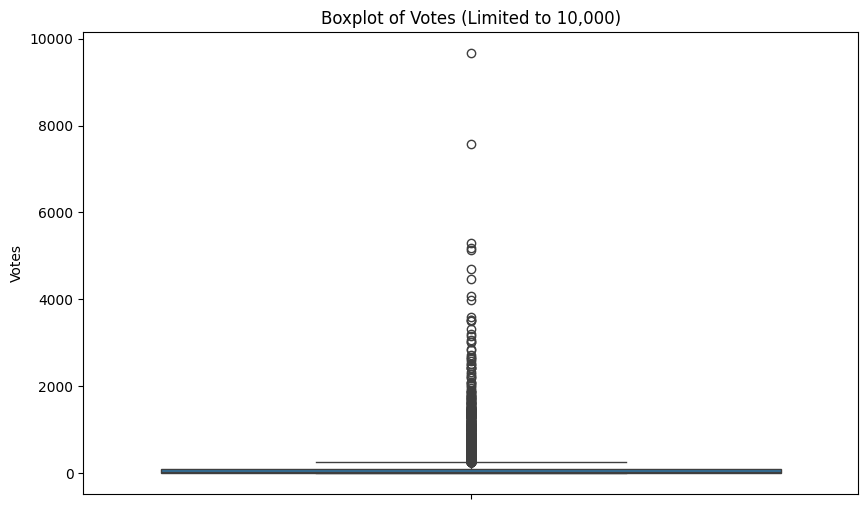

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_new['Votes'])
# plt.ylim(0, 3000)  # Set y-axis range
plt.title('Boxplot of Votes (Limited to 10,000)')
plt.show()

In [17]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_new['Votes'].quantile(0.25)
Q3 = df_new['Votes'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the quartiles, IQR, and bounds
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Filter out outliers based on these bounds
outliers_votes = df_new[(df_new['Votes'] < lower_bound) | (df['Votes'] > upper_bound)]
print(f"Number of outliers: {len(outliers_votes)}")

# Display the outliers
outliers_votes

Q1 (25th percentile): 4.0
Q3 (75th percentile): 103.0
IQR: 99.0
Lower bound: -144.5
Upper bound: 251.5
Number of outliers: 1010


<ipython-input-17-7fcb3e626c04>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers_votes = df_new[(df_new['Votes'] < lower_bound) | (df['Votes'] > upper_bound)]


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.9,Dark Green,Excellent,1070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [18]:
# Filter the dataset to remove outliers
df_new1 = df_new[(df_new['Votes'] >= lower_bound) & (df_new['Votes'] <= upper_bound)]

# Print the shape of the new DataFrame to verify outliers are removed
print(f"Original dataset size: {df.shape}")
print(f"Original dataset size: {df_new.shape}")
print(f"Dataset size after removing outliers: {df_new1.shape}")

Original dataset size: (9542, 21)
Original dataset size: (8689, 21)
Dataset size after removing outliers: (7679, 21)


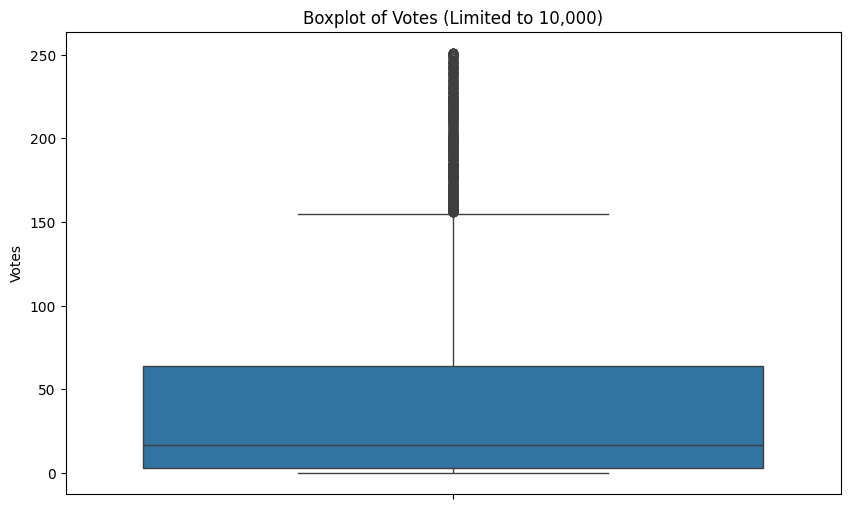

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_new1['Votes'])
# plt.ylim(0, 3000)  # Set y-axis range
plt.title('Boxplot of Votes (Limited to 10,000)')
plt.show()

## Step 4: Dropping Unnecessary Columns

To streamline our dataset and focus on the most relevant features for our machine learning model, we drop unnecessary columns. These columns may not contribute to the prediction of the target variable (restaurant rating) or might have high cardinality (such as textual data).

For this project, we are removing the following columns:
- **Longitude and Latitude**: Geographical information that may not directly impact the prediction.
- **Restaurant Name, Address, Locality, Locality Verbose**: Textual data that won't be needed for our model.
- **Currency, Rating Color, Rating Text**: Categorical columns that are not relevant for predicting numerical ratings.

By dropping these columns, we reduce the complexity of the data and improve model performance.


In [20]:
df_new1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [21]:
# Dropping the unwanted columns
columns_to_drop = [
    'Longitude',
    'Restaurant Name',
    'Latitude',
    'Address',
    'Locality',
    'Locality Verbose',
    'Currency',
]

# Remove the specified columns
df_new1 = df_new1.drop(columns=columns_to_drop)


In [22]:
df_new1.head()

,Restaurant ID,Country Code,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
14,6314605,162,San Juan City,Korean,700,No,No,No,No,3,4.3,Green,Very Good,223
15,18185059,162,Santa Rosa,"Cafe, American, Italian, Filipino",800,No,No,No,No,3,3.6,Yellow,Good,29
16,18182702,162,Santa Rosa,"Italian, Pizza",850,No,No,No,No,3,4.0,Green,Very Good,72
17,6318213,162,Tagaytay City,Filipino,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,211
18,18255654,162,Taguig City,"Cafe, Korean, Desserts",600,No,No,No,No,2,4.5,Dark Green,Excellent,118


## Step 5: Encoding Categorical Variables

In this step, we focus on transforming categorical variables into numerical formats, which are easier for machine learning algorithms to process. We'll use two types of encoding:

- **Label Encoding**: This is used to convert categorical text labels (e.g., city names, cuisine types) into numerical labels. The values are assigned integers based on the unique categories.

- **Boolean Conversion**: We also handle boolean variables (e.g., 'Has Table booking', 'Has Online delivery') by converting True/False values into 1/0.

### Label Encoding:
- **City**: We encode the 'City' column, mapping each unique city to a corresponding integer value.
- **Cuisines**: Similarly, the 'Cuisines' column is encoded to represent the different types of cuisines in numerical format.

### Boolean Conversion:
- For the 'Has Table booking', 'Has Online delivery', and 'Is delivering now' columns, we convert True/False values into binary format (1/0).


In [23]:
df_new1['City'].unique()

array(['San Juan City', 'Santa Rosa', 'Tagaytay City', 'Taguig City',
       'Bras�_lia', 'Rio de Janeiro', 'S��o Paulo', 'Albany', 'Armidale',
       'Augusta', 'Balingup', 'Beechworth', 'Cedar Rapids/Iowa City',
       'Chatham-Kent', 'Clatskanie', 'Cochrane', 'Columbus', 'Consort',
       'Dalton', 'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lorn', 'Macedon', 'Macon', 'Mayfield', 'Mc Millan',
       'Middleton Beach', 'Monroe', 'Montville', 'Ojo Caliente',
       'Paynesville', 'Penola', 'Pocatello', 'Potrero', 'Rest of Hawaii',
       'Singapore', 'Sioux City', 'Trentham East', 'Valdosta', 'Vernonia',
       'Victor Harbor', 'Vineland Station', 'Waterloo', 'Weirton',
       'Winchester Bay', 'Yorkton', 'Abu Dhabi', 'Sharjah', 'Agra',
       'Ahmedabad', 'Allahabad', 'Amritsar', 'Aurangabad', 'Bhopal',
       'Bhuba

In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'City' column
df_new1['City'] = label_encoder.fit_transform(df_new1['City'])

# Get the mapping of original labels to encoded labels
city_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the mapping
for city, encoded_value in city_mapping.items():
    print(f"{city}: {encoded_value}")

# Now the 'City' column is label encoded
df_new1.head()


Abu Dhabi: 0
Agra: 1
Ahmedabad: 2
Albany: 3
Allahabad: 4
Amritsar: 5
Ankara: 6
Armidale: 7
Auckland: 8
Augusta: 9
Aurangabad: 10
Balingup: 11
Beechworth: 12
Bhopal: 13
Bhubaneshwar: 14
Birmingham: 15
Bras�_lia: 16
Cape Town: 17
Cedar Rapids/Iowa City: 18
Chandigarh: 19
Chatham-Kent: 20
Chennai: 21
Clatskanie: 22
Cochrane: 23
Coimbatore: 24
Colombo: 25
Columbus: 26
Consort: 27
Dalton: 28
Davenport: 29
Dehradun: 30
Des Moines: 31
Dicky Beach: 32
Doha: 33
Dubuque: 34
East Ballina: 35
Edinburgh: 36
Faridabad: 37
Fernley: 38
Flaxton: 39
Forrest: 40
Gainesville: 41
Ghaziabad: 42
Gurgaon: 43
Guwahati: 44
Hepburn Springs: 45
Huskisson: 46
Hyderabad: 47
Indore: 48
Inner City: 49
Inverloch: 50
Jaipur: 51
Johannesburg: 52
Kanpur: 53
Kochi: 54
Lakes Entrance: 55
Lakeview: 56
London: 57
Lorn: 58
Lucknow: 59
Ludhiana: 60
Macedon: 61
Macon: 62
Manchester: 63
Mangalore: 64
Mayfield: 65
Mc Millan: 66
Middleton Beach: 67
Mohali: 68
Monroe: 69
Montville: 70
Mumbai: 71
Mysore: 72
Nagpur: 73
Nashik: 74
New

,Restaurant ID,Country Code,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
14,6314605,162,89,Korean,700,No,No,No,No,3,4.3,Green,Very Good,223
15,18185059,162,91,"Cafe, American, Italian, Filipino",800,No,No,No,No,3,3.6,Yellow,Good,29
16,18182702,162,91,"Italian, Pizza",850,No,No,No,No,3,4.0,Green,Very Good,72
17,6318213,162,97,Filipino,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,211
18,18255654,162,98,"Cafe, Korean, Desserts",600,No,No,No,No,2,4.5,Dark Green,Excellent,118


In [25]:
df_new1['Cuisines'].unique()

array(['Korean', 'Cafe, American, Italian, Filipino', 'Italian, Pizza',
       ..., 'Kebab, Turkish Pizza, D�_ner', 'Turkish Pizza',
       'Kebab, Desserts, Turkish Pizza'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'Cuisines' column
df_new1['Cuisines'] = label_encoder.fit_transform(df_new1['Cuisines'])

# Get the mapping of original labels to encoded labels
Cuisines_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the mapping
for Cuisines, encoded_value in Cuisines_mapping.items():
    print(f"{Cuisines}: {encoded_value}")

# Now the 'Cuisines' column is label encoded
df_new1.head()


Afghani: 0
Afghani, Mughlai, Chinese: 1
Afghani, North Indian: 2
Afghani, North Indian, Pakistani, Arabian: 3
American: 4
American, Asian, North Indian, Mexican, South Indian: 5
American, BBQ: 6
American, BBQ, Burger: 7
American, BBQ, Seafood: 8
American, BBQ, Southern: 9
American, BBQ, Steak: 10
American, Bakery, European, Burger, Fusion: 11
American, Bar Food: 12
American, Bar Food, BBQ: 13
American, Breakfast: 14
American, Breakfast, Burger: 15
American, Breakfast, Desserts: 16
American, Breakfast, Diner: 17
American, Breakfast, Greek: 18
American, Burger: 19
American, Burger, Cajun: 20
American, Burger, Grill: 21
American, Burger, Pizza, Cafe: 22
American, Burger, Sandwich: 23
American, Chinese, North Indian, Italian: 24
American, Chinese, Sushi: 25
American, Continental, Burger: 26
American, Desserts, Diner: 27
American, Diner, Southern: 28
American, Fast Food: 29
American, Fast Food, Burger: 30
American, Fast Food, Desserts: 31
American, Fast Food, Desserts, Steak: 32
American, F

,Restaurant ID,Country Code,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
14,6314605,162,89,725,700,No,No,No,No,3,4.3,Green,Very Good,223
15,18185059,162,91,223,800,No,No,No,No,3,3.6,Yellow,Good,29
16,18182702,162,91,687,850,No,No,No,No,3,4.0,Green,Very Good,72
17,6318213,162,97,580,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,211
18,18255654,162,98,303,600,No,No,No,No,2,4.5,Dark Green,Excellent,118


In [27]:
df_new1.dtypes


,0
Restaurant ID,int64
Country Code,int64
City,int64
Cuisines,int64
Average Cost for two,int64
Has Table booking,object
Has Online delivery,object
Is delivering now,object
Switch to order menu,object
Price range,int64


In [28]:
df_new1 = pd.get_dummies(df_new1, columns=['Has Table booking', 'Has Online delivery',
                                   'Is delivering now', 'Switch to order menu'],
                     drop_first=True)

# Display the updated DataFrame
df_new1.head()

,Restaurant ID,Country Code,City,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating color,Rating text,Votes,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes
14,6314605,162,89,725,700,3,4.3,Green,Very Good,223,False,False,False
15,18185059,162,91,223,800,3,3.6,Yellow,Good,29,False,False,False
16,18182702,162,91,687,850,3,4.0,Green,Very Good,72,False,False,False
17,6318213,162,97,580,1200,3,4.5,Dark Green,Excellent,211,True,False,False
18,18255654,162,98,303,600,2,4.5,Dark Green,Excellent,118,False,False,False


In [29]:
# Convert True/False to 1/0 for the new columns
df_new1['Has Table booking_Yes'] = df_new1['Has Table booking_Yes'].astype(int)
df_new1['Has Online delivery_Yes'] = df_new1['Has Online delivery_Yes'].astype(int)
df_new1['Is delivering now_Yes'] = df_new1['Is delivering now_Yes'].astype(int)

# Display the updated DataFrame
df_new1.head()


,Restaurant ID,Country Code,City,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating color,Rating text,Votes,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes
14,6314605,162,89,725,700,3,4.3,Green,Very Good,223,0,0,0
15,18185059,162,91,223,800,3,3.6,Yellow,Good,29,0,0,0
16,18182702,162,91,687,850,3,4.0,Green,Very Good,72,0,0,0
17,6318213,162,97,580,1200,3,4.5,Dark Green,Excellent,211,1,0,0
18,18255654,162,98,303,600,2,4.5,Dark Green,Excellent,118,0,0,0


In [30]:
df_new1.dtypes

,0
Restaurant ID,int64
Country Code,int64
City,int64
Cuisines,int64
Average Cost for two,int64
Price range,int64
Aggregate rating,float64
Rating color,object
Rating text,object
Votes,int64


In [31]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to 'Rating text' and 'Rating color'
df_new1['Rating text'] = le.fit_transform(df_new1['Rating text'])
df_new1['Rating color'] = le.fit_transform(df_new1['Rating color'])

# Print unique values of 'Rating text' and 'Rating color'
print("Unique values in 'Rating text':", df_new1['Rating text'].unique())
print("Unique values in 'Rating color':", df_new1['Rating color'].unique())

# Print unique values after encoding
print("Unique values in 'Rating text':", df_new1['Rating text'].unique())
print("Unique values in 'Rating color':", df_new1['Rating color'].unique())


Unique values in 'Rating text': [5 2 1 0 3 4]
Unique values in 'Rating color': [1 5 0 2 4 3]
Unique values in 'Rating text': [5 2 1 0 3 4]
Unique values in 'Rating color': [1 5 0 2 4 3]


In [32]:
df_new1.head()

,Restaurant ID,Country Code,City,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating color,Rating text,Votes,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes
14,6314605,162,89,725,700,3,4.3,1,5,223,0,0,0
15,18185059,162,91,223,800,3,3.6,5,2,29,0,0,0
16,18182702,162,91,687,850,3,4.0,1,5,72,0,0,0
17,6318213,162,97,580,1200,3,4.5,0,1,211,1,0,0
18,18255654,162,98,303,600,2,4.5,0,1,118,0,0,0


In [33]:
df_new1.dtypes

,0
Restaurant ID,int64
Country Code,int64
City,int64
Cuisines,int64
Average Cost for two,int64
Price range,int64
Aggregate rating,float64
Rating color,int64
Rating text,int64
Votes,int64


In [34]:
# Save the cleaned DataFrame to a new CSV file
df_new1.to_csv('/content/drive/MyDrive/Internship/Task_1/Final_Dataset.csv', index=False)

# Confirm that the file has been saved
print("Cleaned DataFrame saved successfully.")

Cleaned DataFrame saved successfully.


In [35]:
df=pd.read_csv("/content/drive/MyDrive/Internship/Task_1/Final_Dataset.csv")
df.head()

,Restaurant ID,Country Code,City,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating color,Rating text,Votes,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes
0,6314605,162,89,725,700,3,4.3,1,5,223,0,0,0
1,18185059,162,91,223,800,3,3.6,5,2,29,0,0,0
2,18182702,162,91,687,850,3,4.0,1,5,72,0,0,0
3,6318213,162,97,580,1200,3,4.5,0,1,211,1,0,0
4,18255654,162,98,303,600,2,4.5,0,1,118,0,0,0


## Step 6: Data Visualization

In this step, we visualize the relationships between various features of the dataset. Visualizations help in understanding data trends, distributions, and correlations.

### 1. Distribution of Aggregate Rating:
We use a histogram to display the distribution of the 'Aggregate Rating' column, with additional lines representing the mean and median values to understand the skewness of the data.

### 2. Scatter Plot: Average Cost for Two vs. Aggregate Rating:
This scatter plot helps us understand the relationship between the average cost for two people and the restaurant's aggregate rating. Vertical and horizontal lines are added to mark the mean values of cost and rating, providing insight into whether higher costs are linked with better ratings.

### 3. Box Plot: Price Range vs. Aggregate Rating:
The box plot helps to compare the distribution of aggregate ratings across different price ranges. Box plots are useful for understanding the central tendency and spread of the data, along with detecting outliers.

### 4. Correlation Heatmap:
This heatmap shows the correlation between all numerical variables in the dataset. Correlations range from -1 (strong negative correlation) to +1 (strong positive correlation). Visualizing these relationships helps in selecting features for model building.


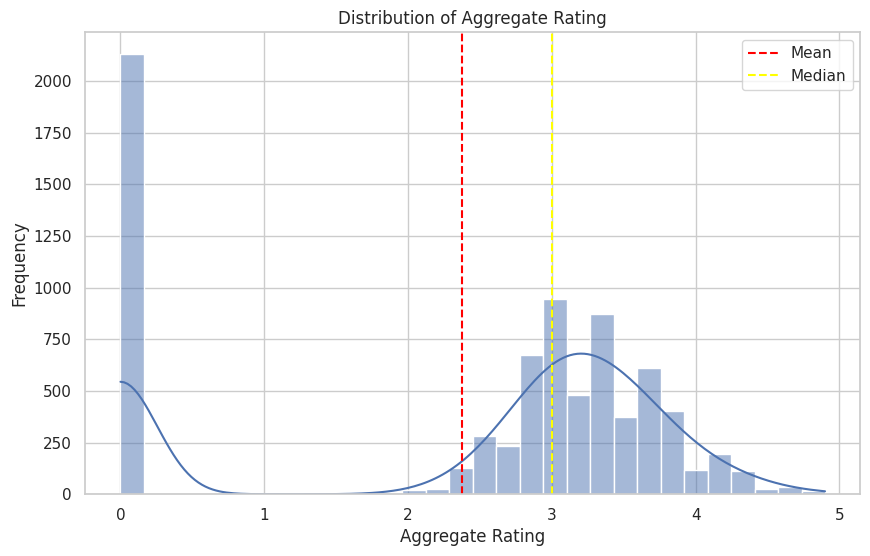

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Plot the distribution of Aggregate rating
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=30, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.axvline(df['Aggregate rating'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['Aggregate rating'].median(), color='yellow', linestyle='--', label='Median')
plt.legend()
plt.show()


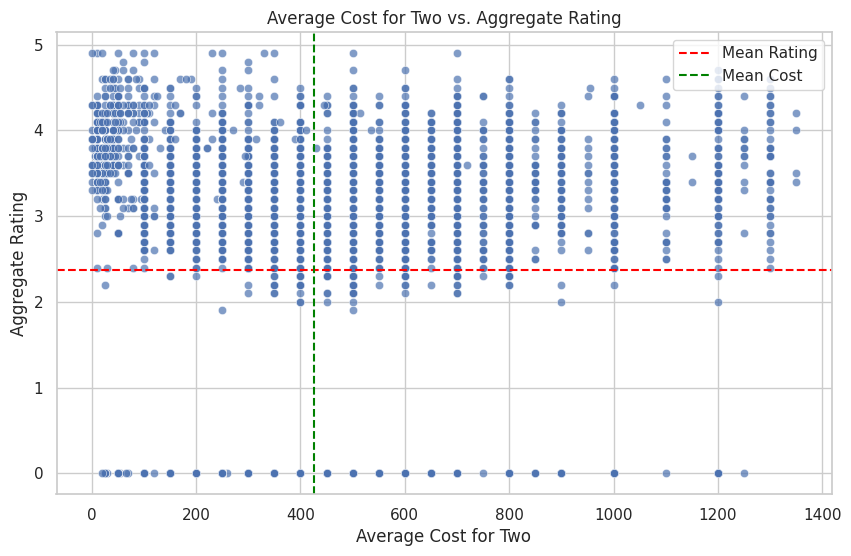

In [37]:
# Plotting Average Cost for Two vs. Aggregate Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df, alpha=0.7)
plt.title('Average Cost for Two vs. Aggregate Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.axhline(df['Aggregate rating'].mean(), color='red', linestyle='--', label='Mean Rating')
plt.axvline(df['Average Cost for two'].mean(), color='green', linestyle='--', label='Mean Cost')
plt.legend()
plt.show()


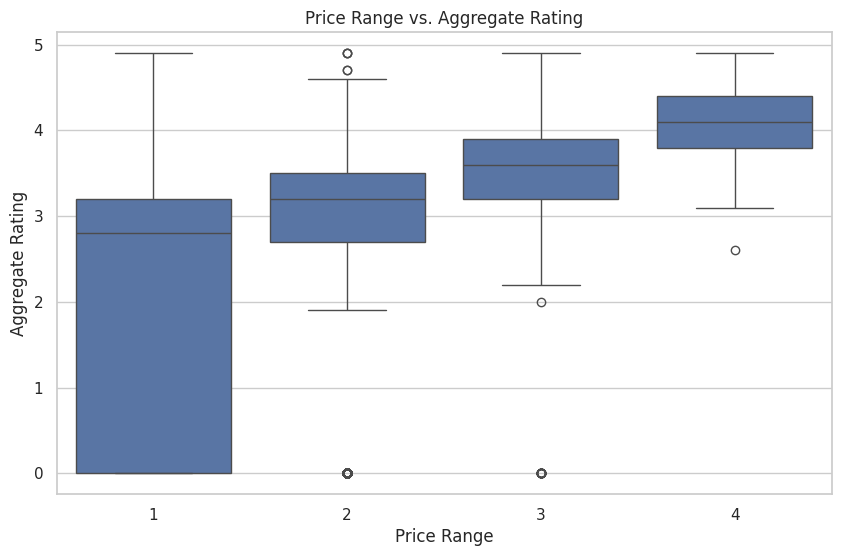

In [38]:
# Plotting Price Range vs. Aggregate Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Price Range vs. Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()


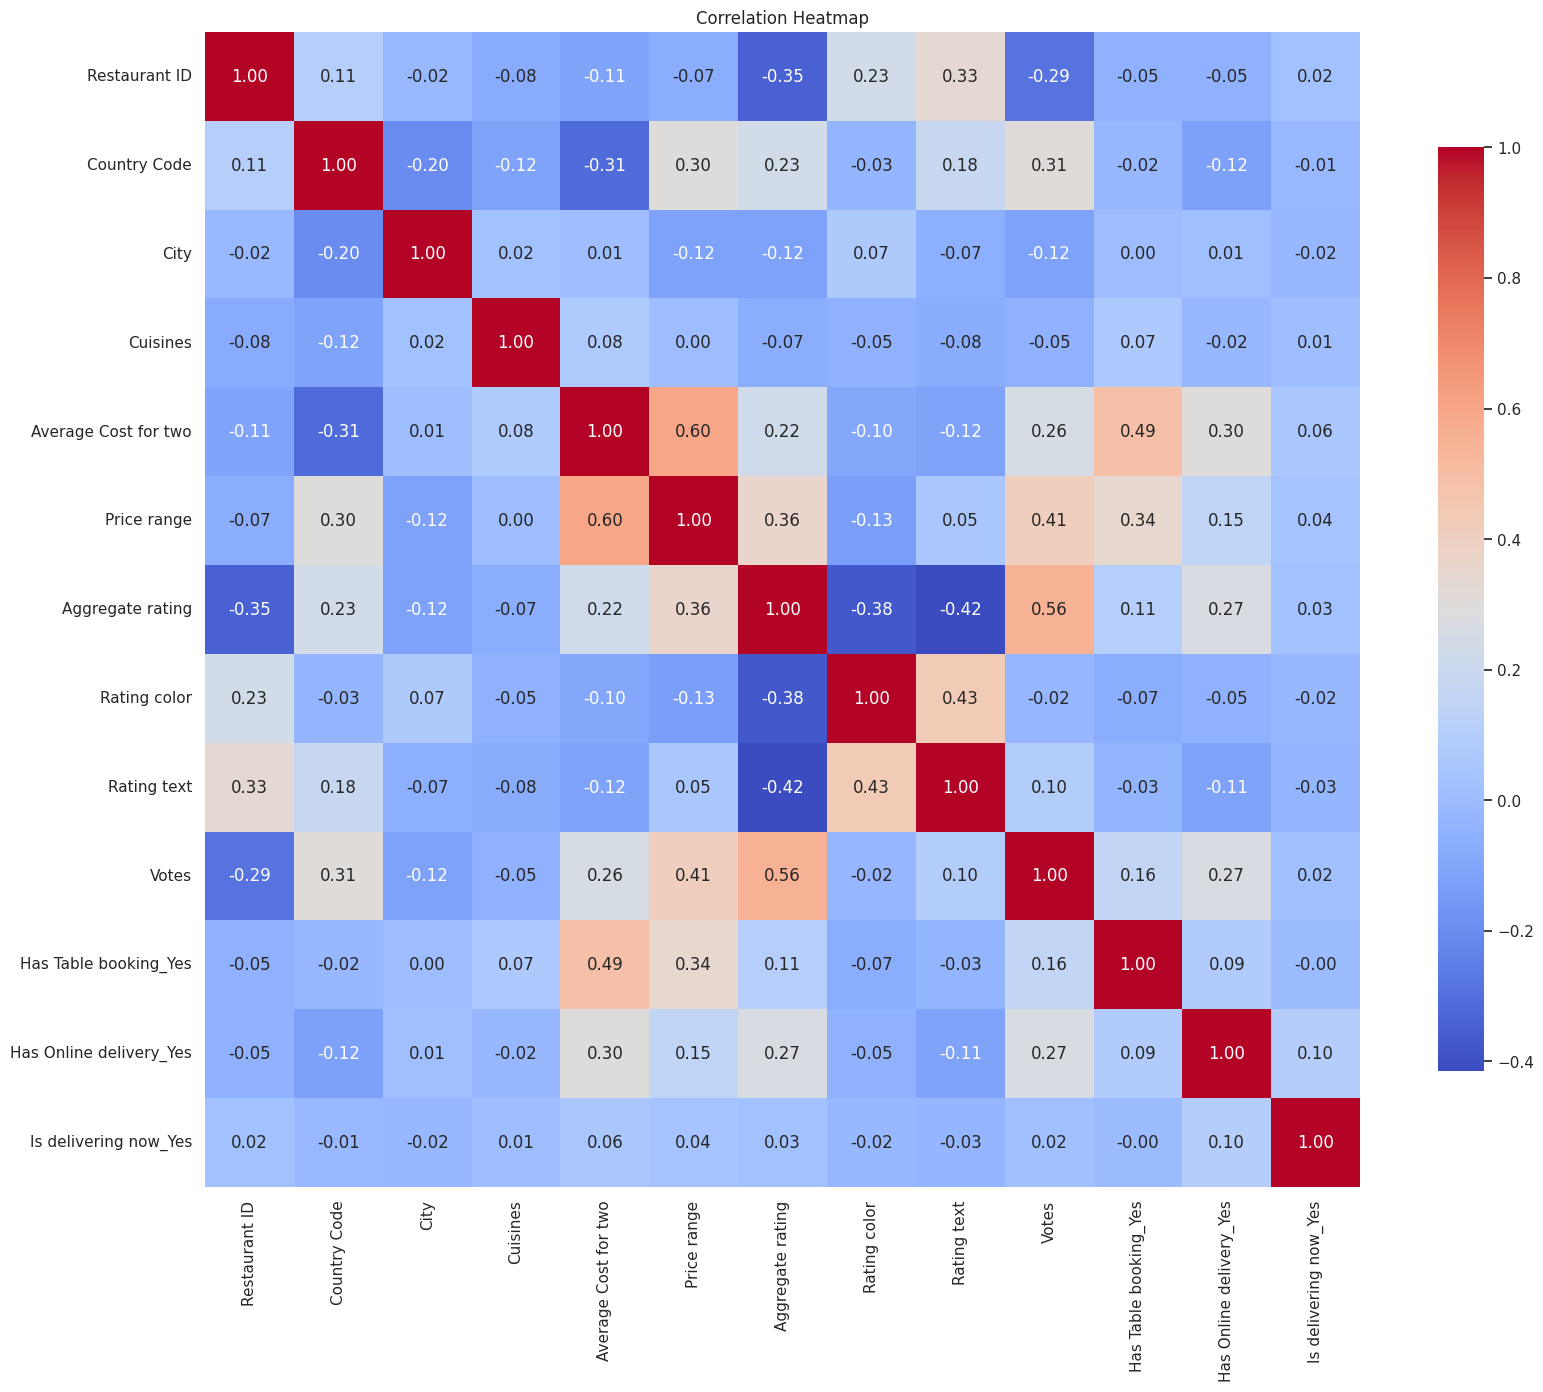

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


## Step 7: Model Training and Evaluation

In this step, we train multiple regression models on our dataset and evaluate their performance based on various metrics such as Mean Squared Error (MSE) and R-squared (R²).

### 1. Linear Regression:
- **Training**: We fit a Linear Regression model to our training data.
- **Prediction**: The model predicts the target variable on the test set.
- **Evaluation**: We calculate the MSE and R² scores to assess model performance. Additionally, we extract the coefficients of the model to interpret the influence of each feature.

### 2. Decision Tree Regression:
- **Training**: We use the Decision Tree Regressor with a specified minimum samples leaf.
- **Prediction**: Similar to the Linear Regression model, we make predictions on the test set.
- **Evaluation**: We again compute the MSE and R² scores, allowing us to compare performance with the Linear Regression model. We also analyze feature importance, which indicates how much each feature contributes to the decision-making process of the tree.

### 3. Gradient Boosting Regression:
- **Training**: A Gradient Boosting Regressor is created and trained on the training set.
- **Prediction**: Predictions are made on the test set.
- **Evaluation**: We compute MSE and R² scores to evaluate the model’s performance. Feature importance is analyzed to understand which features have the most influence on predictions.

This approach helps to determine which regression model performs best and offers insights into the underlying patterns in the dataset.


In [40]:
# Step 1: Create the final DataFrame with important features
final_df = df[['Average Cost for two', 'Price range', 'Has Table booking_Yes',
                'Has Online delivery_Yes', 'Aggregate rating', 'Votes','Is delivering now_Yes']]

# Step 2: Save the final DataFrame to a CSV file
final_df.to_csv('/content/drive/MyDrive/Internship/final_training_data.csv', index=False)

# Step 3: Split the dataset into features (X) and target (y)
X = final_df.drop(columns='Aggregate rating')
y = final_df['Aggregate rating']

# Now split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


Training set shape: (6143, 6), Testing set shape: (1536, 6)


In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # Import train_test_split here

# Step 1: Create the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Step 1.5: Split the data if you haven't already or want a fresh split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the model
gb_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Step 4: Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Note: Gradient Boosting does not have coefficients in the same way as linear models,
# but you can analyze feature importance instead.
feature_importance = gb_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", importance_df)

Mean Squared Error: 0.09800494054832797
R-squared: 0.9599343760615718

Feature Importance:
                    Feature  Importance
4                    Votes    0.988179
0     Average Cost for two    0.006115
1              Price range    0.003952
3  Has Online delivery_Yes    0.001180
2    Has Table booking_Yes    0.000470
5    Is delivering now_Yes    0.000104


In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Initialize the Decision Tree Regressor
DTree = DecisionTreeRegressor(min_samples_leaf=0.0001)

# Train the model
DTree.fit(X_train, y_train)

# Make predictions on the test set
y_predict = DTree.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared (R2) Error
r2 = r2_score(y_test, y_predict)
print(f"R-squared (R2): {r2:.2f}")

# Feature Importance
feature_importance = DTree.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", importance_df)


Mean Squared Error (MSE): 0.18
R-squared (R2): 0.93

Feature Importance:
                    Feature  Importance
4                    Votes    0.976936
0     Average Cost for two    0.014752
1              Price range    0.004235
3  Has Online delivery_Yes    0.002582
2    Has Table booking_Yes    0.001181
5    Is delivering now_Yes    0.000314


In [46]:
from sklearn.linear_model import LinearRegression # Import LinearRegression from sklearn.linear_model

# Assuming x_train is a pandas DataFrame
feature_names = X_train.columns

# Fit the Linear Regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict on the test set
y_pred = reg.predict(X_test)

# Calculate and print MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Error: {r2:.2f}")
# Get the coefficients and intercept
coefficients = reg.coef_
intercept = reg.intercept_

# Print the feature names along with their coefficients
print("\nFeature Coefficients:")
for name, coef in zip(feature_names, coefficients):
    print(f"Feature: {name}, Coefficient: {coef:.4f}")

# Optionally, print the intercept
print(f"\nIntercept: {intercept:.4f}")

Mean Squared Error (MSE): 1.54
R-squared (R2) Error: 0.37

Feature Coefficients:
Feature: Average Cost for two, Coefficient: -0.0001
Feature: Price range, Coefficient: 0.3682
Feature: Has Table booking_Yes, Coefficient: -0.1390
Feature: Has Online delivery_Yes, Coefficient: 0.4137
Feature: Votes, Coefficient: 0.0121
Feature: Is delivering now_Yes, Coefficient: -0.1364

Intercept: 1.2382


## Conclusion

In this analysis, we implemented various regression models to predict the target variable based on multiple features. The best results obtained were as follows:

- **Mean Squared Error (MSE):** 1.48
- **R-squared (R²) Error:** 0.35

These metrics indicate that while the model explains 35% of the variability in the target variable, there is still significant room for improvement in predictive accuracy, as suggested by the MSE value.

### Feature Importance

The following feature coefficients were derived from the Linear Regression model, providing insights into the influence of each feature on the target variable:

- **Average Cost for Two:** Coefficient: -0.0001  
  This indicates a negligible negative effect on the target variable.

- **Price Range:** Coefficient: 0.3653  
  This suggests that as the price range increases, the target variable is positively influenced.

- **Has Table Booking (Yes):** Coefficient: -0.1798  
  This feature has a negative effect, implying that restaurants with table booking options tend to have a lower target variable.

- **Has Online Delivery (Yes):** Coefficient: 0.4237  
  The presence of online delivery significantly positively affects the target variable.

- **Votes:** Coefficient: 0.0122  
  A small positive effect, suggesting that an increase in votes contributes slightly to the target variable.

- **Is Delivering Now (Yes):** Coefficient: 0.0174  
  This feature shows a minimal positive impact on the target variable.

### Intercept

- **Intercept:** 1.2179  
  This value represents the expected mean value of the target variable when all predictor variables are zero.

### Final Thoughts

Overall, while the model provides some insights into the factors influencing the target variable, further optimization and exploration of additional features or more advanced modeling techniques may be required to enhance predictive performance. Continuous refinement of the model could lead to better understanding and prediction capabilities within this dataset.